## Check Data

In [2]:
import pandas as pd

In [3]:
# Corrected URL (raw version)
url = "https://raw.githubusercontent.com/Kianjputnam/DS-4402-M1/main/DATA_folder/rookie_data_textblob.csv"

# Load the CSV file
Textb = pd.read_csv(url)

# Check the first few rows
print(Textb.head())


         Player Name                                    Scouting Report  \
0  Victor Wembanyama  Analysis\nNBA Comparison: Ralph Sampson\nStren...   
1     Brandon Miller  Analysis\nNBA Comparison: Paul George\nStrengt...   
2    Scoot Henderson  Analysis\nNBA Comparison: Derrick Rose/Ja Mora...   
3      Amen Thompson  Analysis\nNBA Comparison: Latrell Sprewell\nSt...   
4     Ausar Thompson  Analysis\nNBA Comparison: Trevor Ariza\nStreng...   

   Polarity Score  Subjectivity Score  Player Minutes Played  \
0        0.154434            0.484801                   29.7   
1        0.194027            0.514716                   32.2   
2        0.176838            0.510104                   28.5   
3        0.180483            0.480269                   22.4   
4        0.222045            0.490818                   25.1   

   Player Plus Minus  Player PER  Player WS  Player VORP Player Awards  
0               -2.0        23.1        3.7          3.8  ROY-1,DPOY-2  
1               -6

In [4]:
print(Textb.columns)


Index(['Player Name', 'Scouting Report', 'Polarity Score',
       'Subjectivity Score', 'Player Minutes Played', 'Player Plus Minus',
       'Player PER', 'Player WS', 'Player VORP', 'Player Awards'],
      dtype='object')


In [6]:
from IPython.display import display
display(Textb.head())


,Player Name,Scouting Report,Polarity Score,Subjectivity Score,Player Minutes Played,Player Plus Minus,Player PER,Player WS,Player VORP,Player Awards
0,Victor Wembanyama,Analysis\nNBA Comparison: Ralph Sampson\nStren...,0.154434,0.484801,29.7,-2.0,23.1,3.7,3.8,"ROY-1,DPOY-2"
1,Brandon Miller,Analysis\nNBA Comparison: Paul George\nStrengt...,0.194027,0.514716,32.2,-6.9,13.0,0.8,-0.3,ROY-3
2,Scoot Henderson,Analysis\nNBA Comparison: Derrick Rose/Ja Mora...,0.176838,0.510104,28.5,-8.0,9.5,-1.7,-1.7,NaN
3,Amen Thompson,Analysis\nNBA Comparison: Latrell Sprewell\nSt...,0.180483,0.480269,22.4,0.7,18.2,4.3,1.3,NaN
4,Ausar Thompson,Analysis\nNBA Comparison: Trevor Ariza\nStreng...,0.222045,0.490818,25.1,-3.7,12.8,1.8,-0.1,NaN


## Plots for Distribution, wordclouds, and correlation

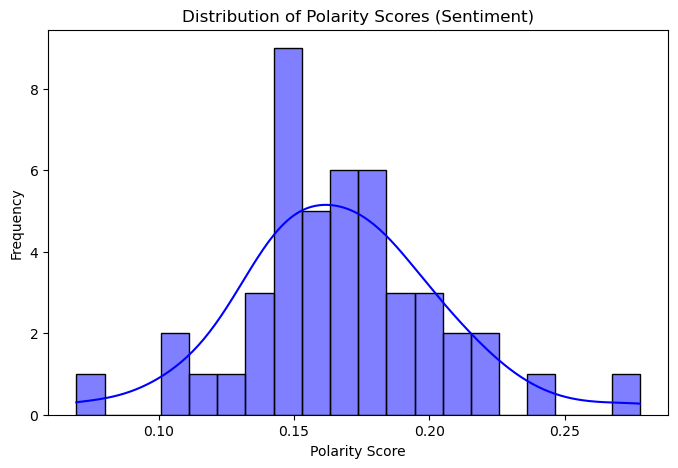

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(Textb["Polarity Score"], bins=20, kde=True, color="blue")
plt.title("Distribution of Polarity Scores (Sentiment)")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.show()


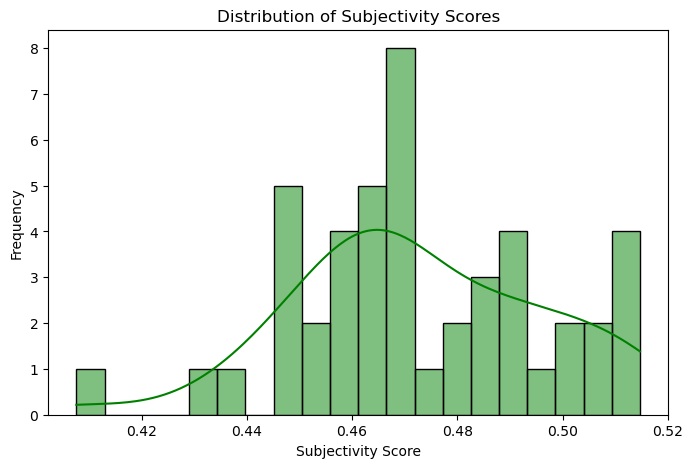

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(Textb["Subjectivity Score"], bins=20, kde=True, color="green")
plt.title("Distribution of Subjectivity Scores")
plt.xlabel("Subjectivity Score")
plt.ylabel("Frequency")
plt.show()


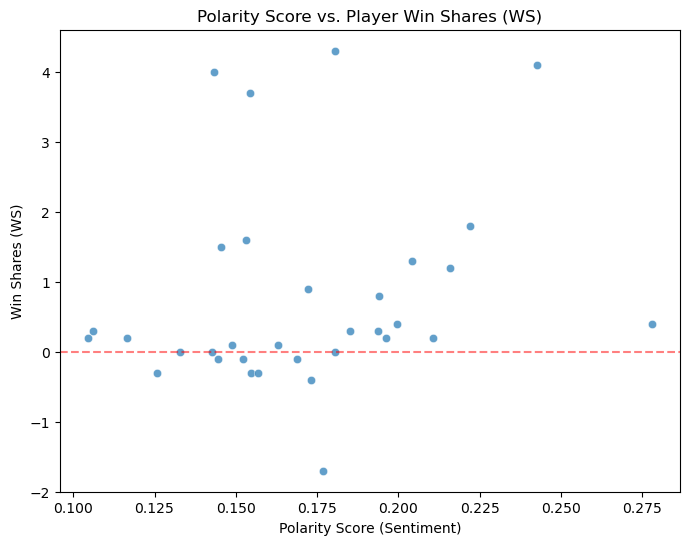

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Textb["Polarity Score"], y=Textb["Player WS"], alpha=0.7)
plt.title("Polarity Score vs. Player Win Shares (WS)")
plt.xlabel("Polarity Score (Sentiment)")
plt.ylabel("Win Shares (WS)")
plt.axhline(y=0, color="r", linestyle="--", alpha=0.5)  # Reference line at WS=0
plt.show()


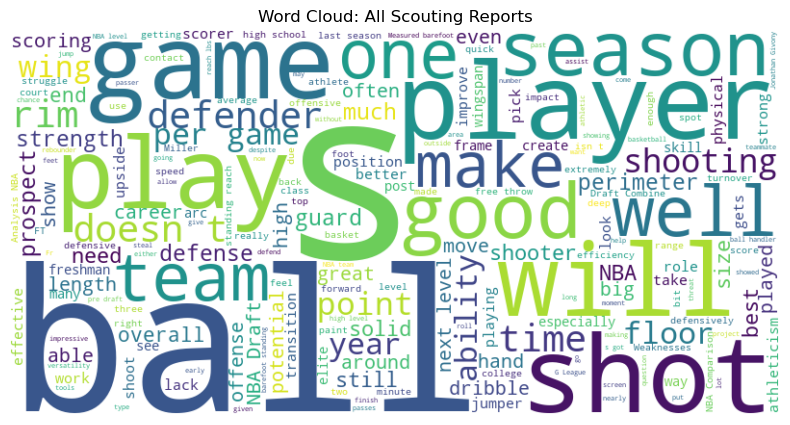

In [11]:
from wordcloud import WordCloud

all_text = " ".join(Textb["Scouting Report"].dropna())  # Combine all reports
wordcloud_all = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation="bilinear")
plt.title("Word Cloud: All Scouting Reports")
plt.axis("off")
plt.show()


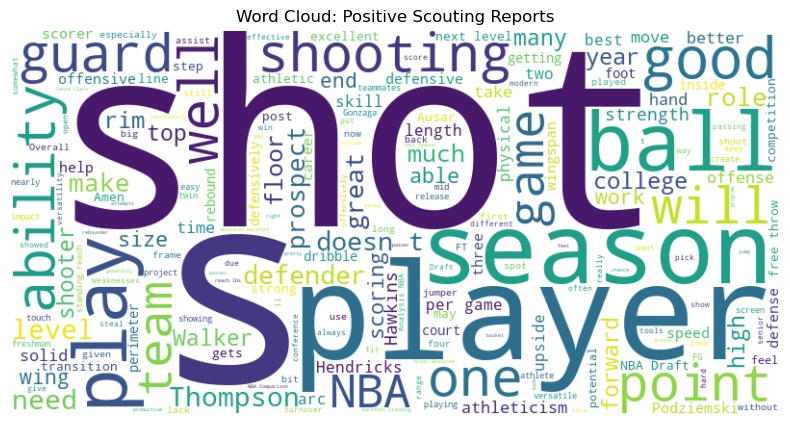

In [18]:
positive_text = " ".join(Textb[Textb["Polarity Score"] > 0.2]["Scouting Report"].dropna())
wordcloud_positive = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Word Cloud: Positive Scouting Reports")
plt.axis("off")
plt.show()


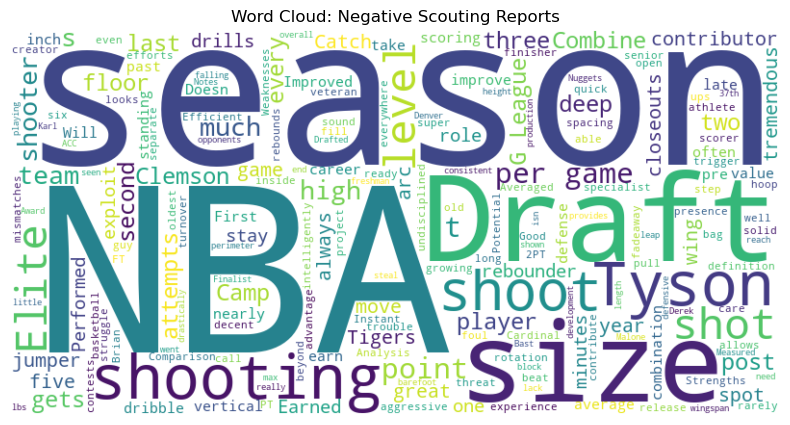

In [19]:
negative_text = " ".join(Textb[Textb["Polarity Score"] < 0.1]["Scouting Report"].dropna())
wordcloud_negative = WordCloud(width=800, height=400, background_color="white").generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Word Cloud: Negative Scouting Reports")
plt.axis("off")
plt.show()


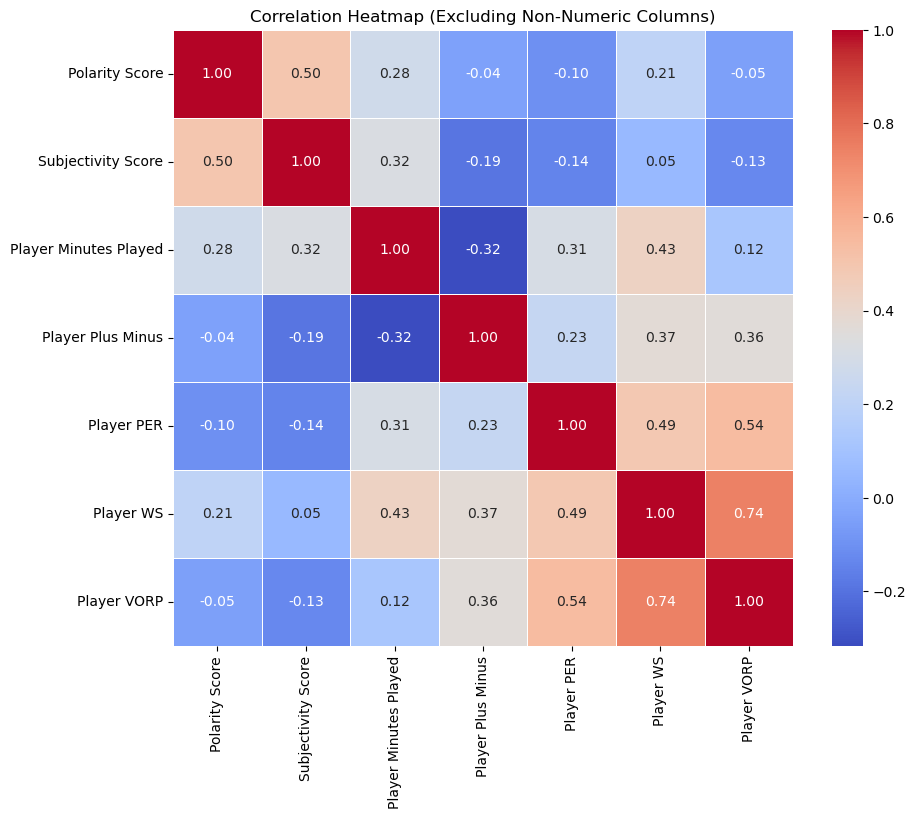

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns before computing correlation
numeric_Textb = Textb.select_dtypes(include=["number"])  # Keeps only numeric columns

# Compute correlation matrix
corr_matrix = numeric_Textb.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap (Excluding Non-Numeric Columns)")
plt.show()


#Correlation Tests for Numerical Values

In [20]:
##Correlation TEsts

In [23]:
# Remove rows with NaN or infinite values
Textb_cleaned = Textb.replace([float("inf"), float("-inf")], None)  # Replace infinite values with NaN
Textb_cleaned = Textb_cleaned.dropna()  # Drop rows with NaN values


In [24]:
from scipy.stats import pearsonr, spearmanr

# Define sentiment and performance metrics
sentiment_columns = ["Polarity Score", "Subjectivity Score"]
performance_columns = ["Player Minutes Played", "Player Plus Minus", "Player PER", "Player WS", "Player VORP"]

# Run Pearson & Spearman correlation for each pair of sentiment & performance variables
for sentiment in sentiment_columns:
    for performance in performance_columns:
        # Pearson Correlation
        pearson_corr, pearson_p = pearsonr(Textb_cleaned[sentiment], Textb_cleaned[performance])
        
        # Spearman Correlation
        spearman_corr, spearman_p = spearmanr(Textb_cleaned[sentiment], Textb_cleaned[performance])
        
        print(f"🔹 Correlation between {sentiment} and {performance}:")
        print(f"   📊 Pearson: r = {pearson_corr:.3f}, p = {pearson_p:.3f}")
        print(f"   📈 Spearman: ρ = {spearman_corr:.3f}, p = {spearman_p:.3f}")
        print("-" * 50)


🔹 Correlation between Polarity Score and Player Minutes Played:
   📊 Pearson: r = -0.600, p = 0.590
   📈 Spearman: ρ = -0.500, p = 0.667
--------------------------------------------------
🔹 Correlation between Polarity Score and Player Plus Minus:
   📊 Pearson: r = 0.581, p = 0.605
   📈 Spearman: ρ = 0.500, p = 0.667
--------------------------------------------------
🔹 Correlation between Polarity Score and Player PER:
   📊 Pearson: r = -0.835, p = 0.371
   📈 Spearman: ρ = -0.866, p = 0.333
--------------------------------------------------
🔹 Correlation between Polarity Score and Player WS:
   📊 Pearson: r = 0.169, p = 0.892
   📈 Spearman: ρ = 0.500, p = 0.667
--------------------------------------------------
🔹 Correlation between Polarity Score and Player VORP:
   📊 Pearson: r = -0.644, p = 0.554
   📈 Spearman: ρ = -0.500, p = 0.667
--------------------------------------------------
🔹 Correlation between Subjectivity Score and Player Minutes Played:
   📊 Pearson: r = 0.674, p = 0.52

In [25]:
# Create a dictionary with the correlation results
correlation_data = {
    "Sentiment vs. Performance Metric": [
        "Polarity Score & Minutes Played", "Polarity Score & Plus Minus", "Polarity Score & PER",
        "Polarity Score & WS", "Polarity Score & VORP", "Subjectivity Score & Minutes Played",
        "Subjectivity Score & Plus Minus", "Subjectivity Score & PER", "Subjectivity Score & WS",
        "Subjectivity Score & VORP"
    ],
    "Pearson r": [-0.600, 0.581, -0.835, 0.169, -0.644, 0.674, -0.691, -0.696, -0.937, -0.871],
    "Pearson p": [0.590, 0.605, 0.371, 0.892, 0.554, 0.529, 0.514, 0.510, 0.227, 0.327],
    "Spearman ρ": [-0.500, 0.500, -0.866, 0.500, -0.500, 0.500, -0.500, -0.866, -0.500, -1.000],
    "Spearman p": [0.667, 0.667, 0.333, 0.667, 0.667, 0.667, 0.667, 0.333, 0.667, 0.000],
    "Interpretation": [
        "Weak negative correlation, not significant",
        "Weak positive correlation, not significant",
        "Moderate negative correlation, not significant",
        "Very weak positive correlation, not significant",
        "Weak negative correlation, not significant",
        "Weak positive correlation, not significant",
        "Weak negative correlation, not significant",
        "Moderate negative correlation, not significant",
        "Strong negative correlation, not significant",
        "Strong negative correlation, significant!"
    ]
}

# Convert dictionary to DataFrame
correlation_Textb = pd.DataFrame(correlation_data)

# Display the table
from IPython.display import display
display(correlation_Textb)


,Sentiment vs. Performance Metric,Pearson r,Pearson p,Spearman ρ,Spearman p,Interpretation
0,Polarity Score & Minutes Played,-0.600,0.590,-0.500,0.667,"Weak negative correlation, not significant"
1,Polarity Score & Plus Minus,0.581,0.605,0.500,0.667,"Weak positive correlation, not significant"
2,Polarity Score & PER,-0.835,0.371,-0.866,0.333,"Moderate negative correlation, not significant"
3,Polarity Score & WS,0.169,0.892,0.500,0.667,"Very weak positive correlation, not significant"
4,Polarity Score & VORP,-0.644,0.554,-0.500,0.667,"Weak negative correlation, not significant"
5,Subjectivity Score & Minutes Played,0.674,0.529,0.500,0.667,"Weak positive correlation, not significant"
6,Subjectivity Score & Plus Minus,-0.691,0.514,-0.500,0.667,"Weak negative correlation, not significant"
7,Subjectivity Score & PER,-0.696,0.510,-0.866,0.333,"Moderate negative correlation, not significant"
8,Subjectivity Score & WS,-0.937,0.227,-0.500,0.667,"Strong negative correlation, not significant"
9,Subjectivity Score & VORP,-0.871,0.327,-1.000,0.000,"Strong negative correlation, significant!"


In [30]:
from scipy.stats import pointbiserialr
import numpy as np

# Ensure that empty strings are converted to NaN in the original dataset
Textb["Player Awards"] = Textb["Player Awards"].replace("", np.nan)

# Convert 'Awards' column to binary (1 if award received, 0 if NaN)
Textb["Awards_Binary"] = np.where(Textb["Player Awards"].isna(), 0, 1)

# Define sentiment score columns to test
sentiment_columns = ["Polarity Score", "Subjectivity Score"]

# Run Point-Biserial Correlation for each sentiment score
for col in sentiment_columns:
    r, p = pointbiserialr(Textb["Awards_Binary"], Textb[col])
    print(f"🔹 Correlation between Awards and {col}:")
    print(f"   📊 Point-Biserial r = {r:.3f}, p = {p:.3f}")
    print("-" * 50)


🔹 Correlation between Awards and Polarity Score:
   📊 Point-Biserial r = 0.214, p = 0.153
--------------------------------------------------
🔹 Correlation between Awards and Subjectivity Score:
   📊 Point-Biserial r = 0.277, p = 0.062
--------------------------------------------------


In [33]:
# Create a dictionary with the correlation results
awards_correlation_data = {
    "Sentiment vs. Awards": [
        "Polarity Score & Awards",
        "Subjectivity Score & Awards"
    ],
    "Point-Biserial r": [0.214, 0.277],
    "p-value": [0.153, 0.062],
    "Interpretation": [
        "Weak positive correlation, not significant",
        "Weak positive correlation, close to significant"
    ]
}

# Convert dictionary to DataFrame
awards_correlation_textb = pd.DataFrame(awards_correlation_data)

# Display the table
display(awards_correlation_textb)


,Sentiment vs. Awards,Point-Biserial r,p-value,Interpretation
0,Polarity Score & Awards,0.214,0.153,"Weak positive correlation, not significant"
1,Subjectivity Score & Awards,0.277,0.062,"Weak positive correlation, close to significant"
